#### Import module

In [6]:
import os
import sys

import pydocumentdb.documents as documents
import pydocumentdb.document_client as document_client
import pydocumentdb.errors as errors

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import documentDB.config as cfg
import tools.screensize as ssize

import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)



In [8]:
feedoptions = {
    'SSLCertFile':'C:\Users\hauretouze_m\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Azure Cosmos DB Emulator\documentdbemulatorcert.cer'
}

client = document_client.DocumentClient(cfg.settings.host, {'masterKey': cfg.settings.master_key})
db_query = "select * from r where r.id = '{0}'".format(cfg.settings.database_id)
db = list(client.QueryDatabases(db_query, options = feedoptions))[0]
db_link = db['_self']

print db_link

coll_query = "select * from r where r.id = '{0}'".format(cfg.settings.collection_id)
coll = list(client.QueryCollections(db_link, coll_query, options = feedoptions))

print len(coll)

coll_link = coll[0]['_self']

print(coll_link)

try:
    res ="accepted_offers"
    doc_query = "select * from c where c.resourcename = '{0}'".format(res)
    docs = list(client.QueryDocuments(coll_link, doc_query, options = feedoptions))
except errors.DocumentDBError as e:
    if e.status_code == 404:
        print e
    else:
        print e
        
#print list(docs)

dbs/KQ9ZAA==/
1
dbs/KQ9ZAA==/colls/KQ9ZAI8kmwA=/


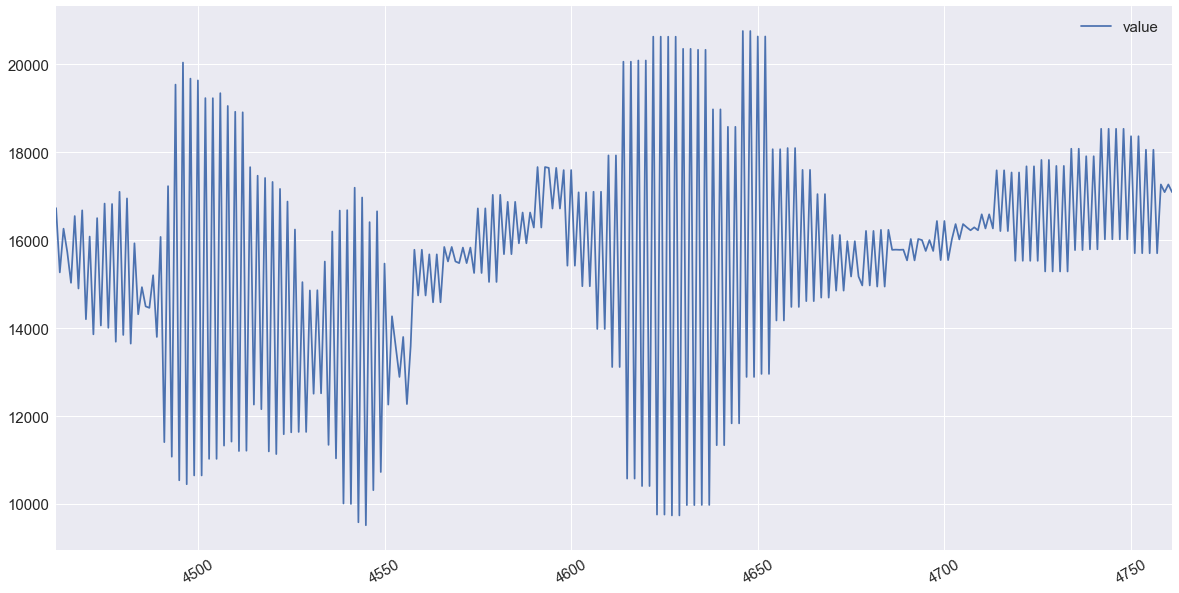

In [76]:
d = docs[6]
dt = pd.DataFrame.from_dict(d["data"])

dt.loc[dt.type == "RR"][0:300].plot(figsize=(20,10),fontsize=15)
plt.xticks(rotation=30,fontsize=15)
plt.legend(fontsize=15)
plt.show()
